# Basic stats of AU data

In [1]:
datafile = '../example/all_frames.csv'
#-----------------

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.3f}'.format
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.read_csv(datafile, skipinitialspace=True)

print('n:',df.shape[0])

df_c = df[df.columns[df.columns.str.contains('_c')]]
df_r = df[df.columns[df.columns.str.contains('_r')]]

print('AU_r feature count:', df_r.shape[1])
print('AU_r features:' , list(df_r.columns))
print('AU_c feature count:', df_c.shape[1])
print('AU_c features:', list(df_c.columns))


n: 1311353
AU_r feature count: 17
AU_r features: ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']
AU_c feature count: 18
AU_c features: ['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c']


## Correlations

In [2]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).reset_index()
    au_corr.columns = ['0','1','r']
    au_corr['abs(r)'] = au_corr['r'].abs()
    au_corr.sort_values(by='abs(r)',ascending=False, inplace=True)
    return au_corr[0:n]
#============================================================
print("Top AU_c Correlations")
display(get_top_abs_correlations(df_c, 15))
print()
print("Top AU_r Correlations")
display(get_top_abs_correlations(df_r, 15))

Top AU_c Correlations


,0,1,r,abs(r)
0,AU01_c,AU02_c,0.588,0.588
65,AU06_c,AU12_c,0.493,0.493
108,AU12_c,AU14_c,0.392,0.392
147,AU25_c,AU26_c,0.382,0.382
62,AU06_c,AU07_c,0.355,0.355
64,AU06_c,AU10_c,0.349,0.349
98,AU10_c,AU12_c,0.330,0.330
66,AU06_c,AU14_c,0.306,0.306
134,AU17_c,AU25_c,-0.298,0.298
125,AU15_c,AU17_c,0.293,0.293



Top AU_r Correlations


,0,1,r,abs(r)
0,AU01_r,AU02_r,0.703,0.703
61,AU06_r,AU12_r,0.699,0.699
60,AU06_r,AU10_r,0.560,0.560
91,AU10_r,AU12_r,0.551,0.551
58,AU06_r,AU07_r,0.473,0.473
100,AU12_r,AU14_r,0.414,0.414
92,AU10_r,AU14_r,0.385,0.385
105,AU12_r,AU25_r,0.380,0.380
62,AU06_r,AU14_r,0.379,0.379
133,AU25_r,AU26_r,0.364,0.364


## Histograms

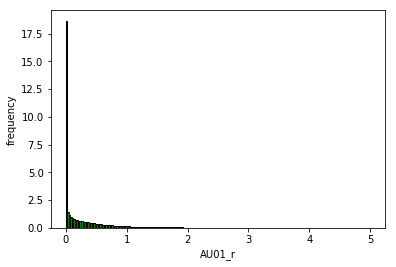

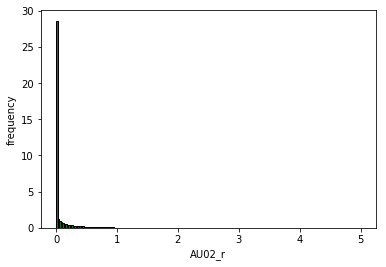

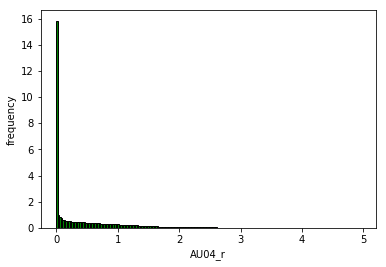

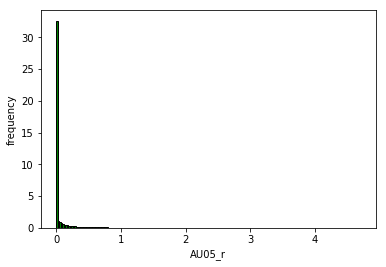

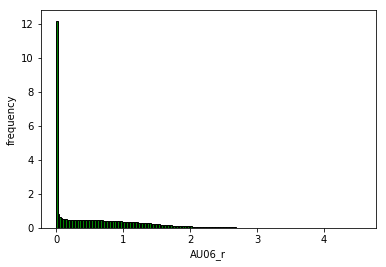

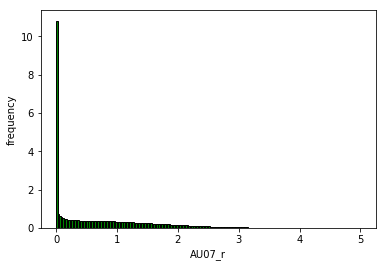

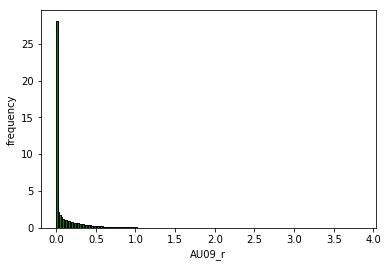

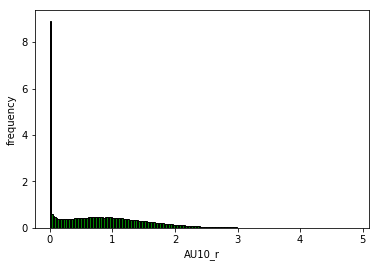

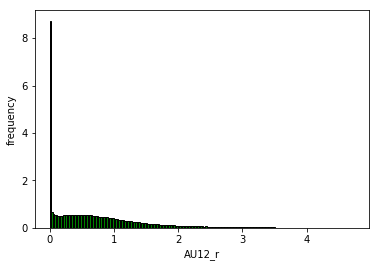

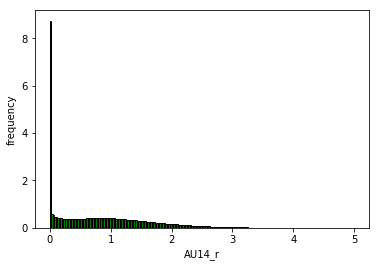

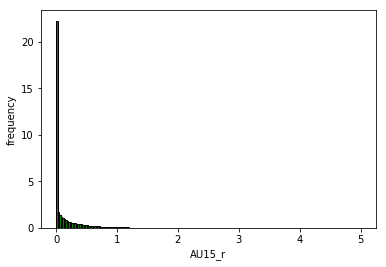

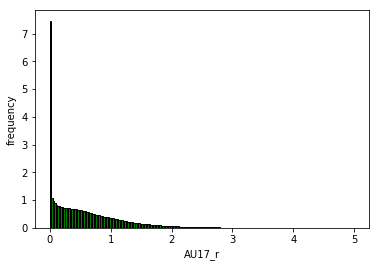

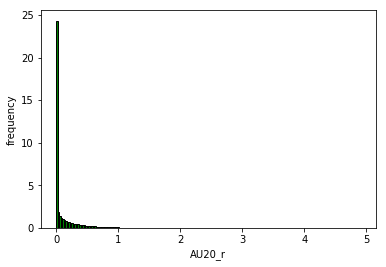

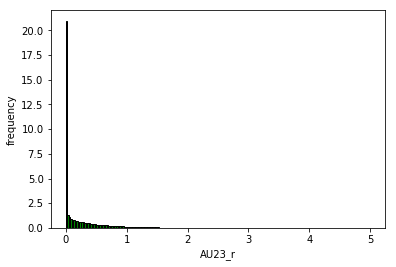

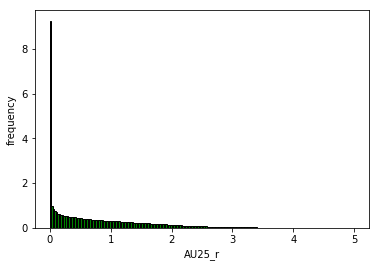

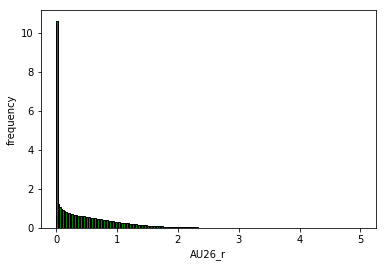

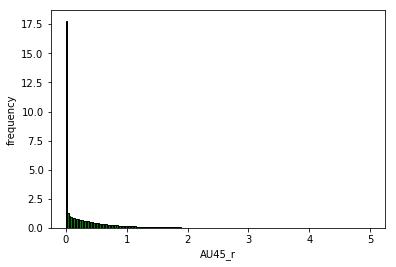

In [6]:
for feature in df_r.columns:
    plt.hist(df_r.loc[:,feature], 200, color='green', \
         histtype='bar', ec='black', normed=1)
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

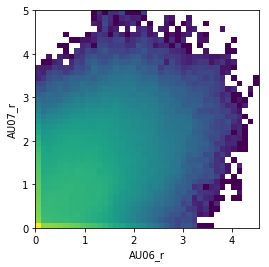

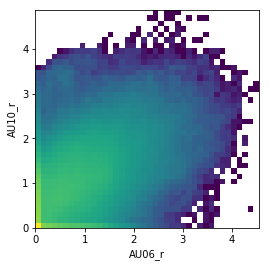

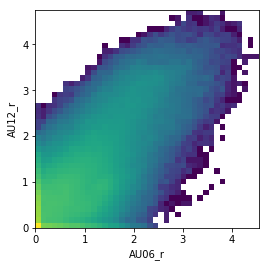

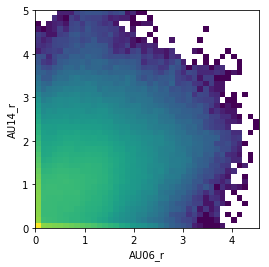

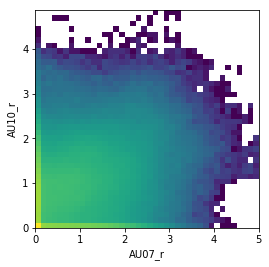

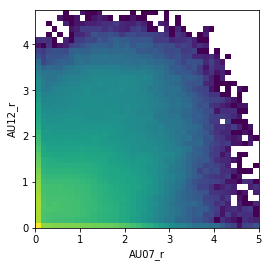

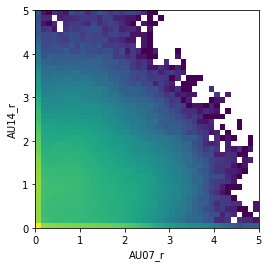

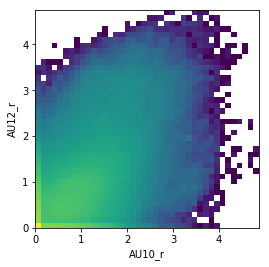

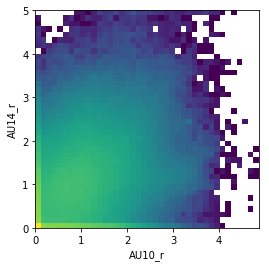

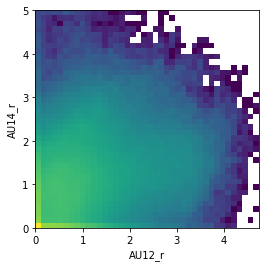

In [4]:
from matplotlib.colors import LogNorm
from itertools import combinations

good_features = ['AU06_r','AU07_r','AU10_r','AU12_r','AU14_r']

feature_combo_list = list(combinations(good_features,2))        
for feature_subset in feature_combo_list:
    plt.figure(figsize=(4,4))
    h = plt.hist2d(df.loc[:,feature_subset[0]], df.loc[:,feature_subset[1]], bins=40, norm=LogNorm())
    #plt.hist2d(df.loc[:,feature_subset[0]], df.loc[:,feature_subset[1]], bins=40)
    plt.xlabel(feature_subset[0])
    plt.ylabel(feature_subset[1])
    #plt.colorbar()
    plt.show()


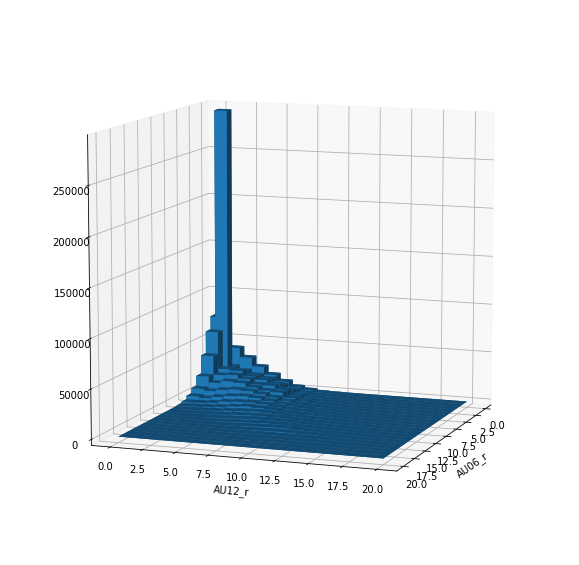

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


f1 = 'AU06_r'
f2 = 'AU12_r'
counts, xedges, yedges, Image = plt.hist2d(df.loc[:,f1], df.loc[:,f2], bins=20, norm=LogNorm())
plt.close()
data_array = counts
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()


ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
#ax.view_init(elev=40., azim=-10)
ax.view_init(elev=10., azim=20)
ax.set_xlabel(f1)
ax.set_ylabel(f2)
#plt.savefig('3dhist.png')
#for ii in range(0,360,1):
#    ax.view_init(elev=10., azim=ii)
#    plt.savefig("movie%d.png" % ii)
#
# Finally, display the plot.
#
plt.show()

In [ ]:
y_data.shape
